In [ ]:
import numpy as np, pandas as pd
from google.colab import files
import matplotlib.pyplot as plt, seaborn as sns
from scipy import stats
from scipy.stats import mannwhitneyu
!pip install pmdarima

In [ ]:
# use Covid19-vaccination.csv for part 1~3
upload = files.upload()

Saving Covid19-vaccination.csv to Covid19-vaccination.csv


In [ ]:
df = pd.read_csv('Covid19-vaccination.csv')
df.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003


# Part 1: Data Cleaning

check out the missing data

In [ ]:
df.isna().sum()

location                                   0
iso_code                                   0
date                                       0
total_vaccinations                     27277
people_vaccinated                      28883
people_fully_vaccinated                31853
total_boosters                         56393
daily_vaccinations_raw                 33083
daily_vaccinations                       326
total_vaccinations_per_hundred         27277
people_vaccinated_per_hundred          28883
people_fully_vaccinated_per_hundred    31853
total_boosters_per_hundred             56393
daily_vaccinations_per_million           326
daily_people_vaccinated                 1558
daily_people_vaccinated_per_hundred     1558
dtype: int64

drop the total_vaccinations missing data, as without this value any raw doesn't make much sense.

In [ ]:
df = df.drop(df[df.total_vaccinations.isna()].index)
df.isna().sum()

location                                   0
iso_code                                   0
date                                       0
total_vaccinations                         0
people_vaccinated                       1879
people_fully_vaccinated                 4751
total_boosters                         29169
daily_vaccinations_raw                  5806
daily_vaccinations                       235
total_vaccinations_per_hundred             0
people_vaccinated_per_hundred           1879
people_fully_vaccinated_per_hundred     4751
total_boosters_per_hundred             29169
daily_vaccinations_per_million           235
daily_people_vaccinated                  882
daily_people_vaccinated_per_hundred      882
dtype: int64

##people vaccinated

In [ ]:
check_df = df.drop(df[df.people_vaccinated.isna()].index)
check_df.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,NaN,1367.0,0.02,0.02,NaN,NaN,34.0,1367.0,0.003
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,NaN,NaN,NaN,2862.0,0.14,0.14,NaN,NaN,72.0,2862.0,0.007
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,NaN,NaN,NaN,3000.0,0.30,0.30,NaN,NaN,75.0,3000.0,0.008
59,Afghanistan,AFG,2021-04-22,240000.0,240000.0,NaN,NaN,NaN,8000.0,0.60,0.60,NaN,NaN,201.0,8000.0,0.020


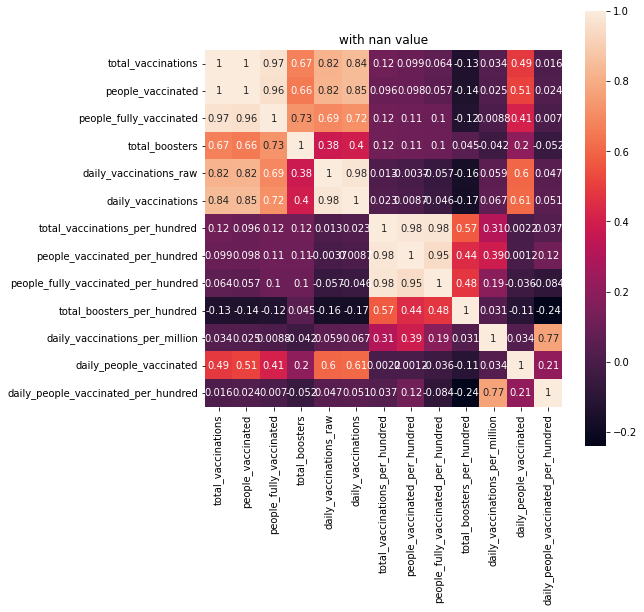

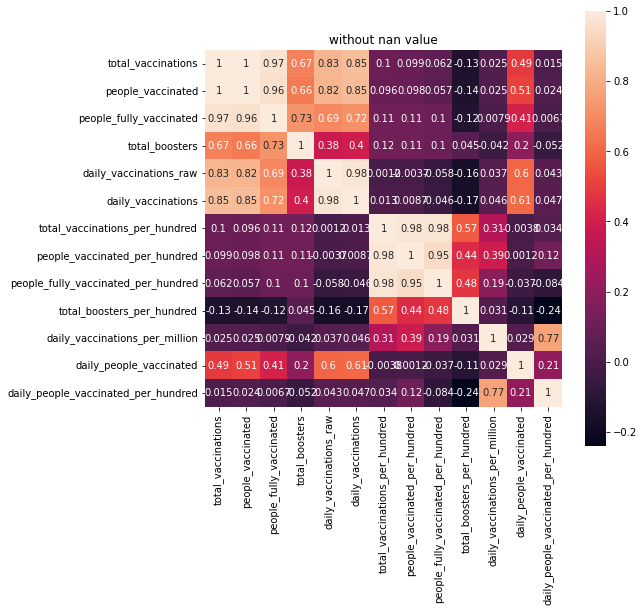

In [ ]:
#correlation matrix
plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, square=True)
plt.title('with nan value')
plt.show()
plt.subplots(figsize=(8, 8))
sns.heatmap(check_df.corr(), annot=True, square=True)
plt.title('without nan value')
plt.show()

people_vaccinated has high correlation with total_vaccination, use mannwhitneyu to test their distrubution

In [ ]:
p = mannwhitneyu(check_df['total_vaccinations'], check_df['people_vaccinated'])[1]
print(p)

2.0801436418698192e-83


p << 0.05, we should fill 0 to nan values in people_vaccinated

##people fully vaccinated

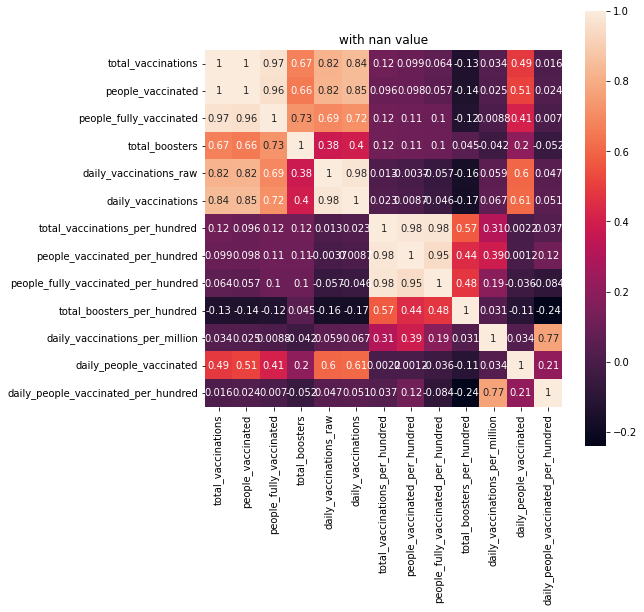

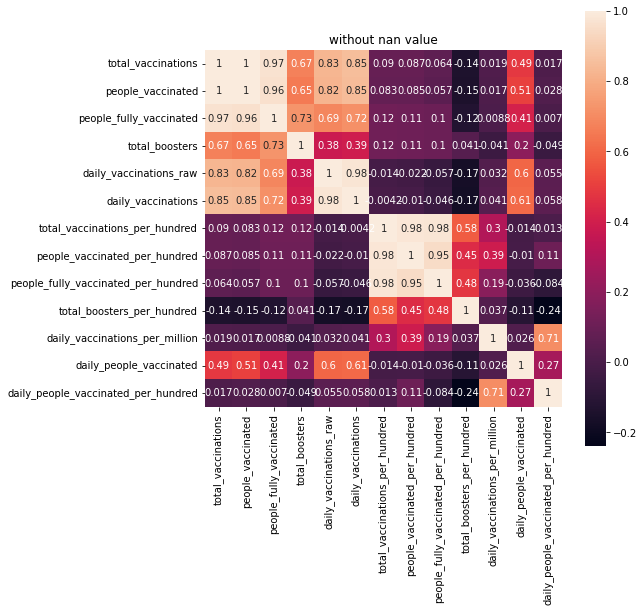

In [ ]:
check_df = df.drop(df[df.people_fully_vaccinated.isna()].index)
#correlation matrix
plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, square=True)
plt.title('with nan value')
plt.show()
plt.subplots(figsize=(8, 8))
sns.heatmap(check_df.corr(), annot=True, square=True)
plt.title('without nan value')
plt.show()

people_fully_vaccinated has high correlation with total_vaccination, use mannwhitneyu to test their distrubution

In [ ]:
p = mannwhitneyu(check_df['total_vaccinations'], check_df['people_fully_vaccinated'])[1]
print(p)

0.0


p << 0.05, fill 0

##daily_vaccinations and daily_vaccinations_raw

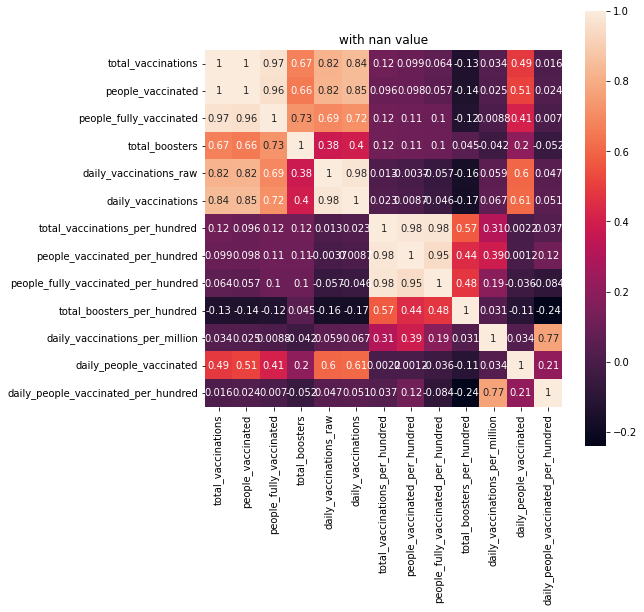

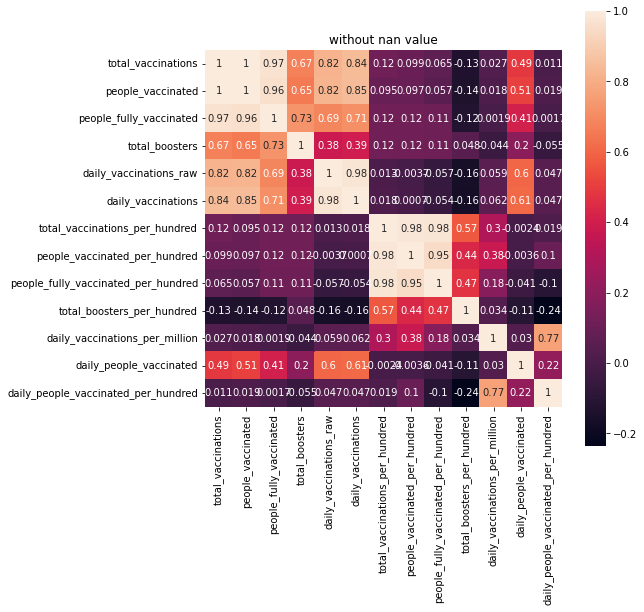

In [ ]:
check_df = df.drop(df[df.daily_vaccinations.isna()].index)
check_df = check_df.drop(check_df[check_df.daily_vaccinations_raw.isna()].index)
#correlation matrix
plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, square=True)
plt.title('with nan value')
plt.show()
plt.subplots(figsize=(8, 8))
sns.heatmap(check_df.corr(), annot=True, square=True)
plt.title('without nan value')
plt.show()

In [ ]:
p = mannwhitneyu(check_df['daily_vaccinations'], check_df['daily_vaccinations_raw'])[1]
print(p)

8.962249403034227e-08


p << 0.05, they donot have the same distribution.

##people vaccinated per hundred

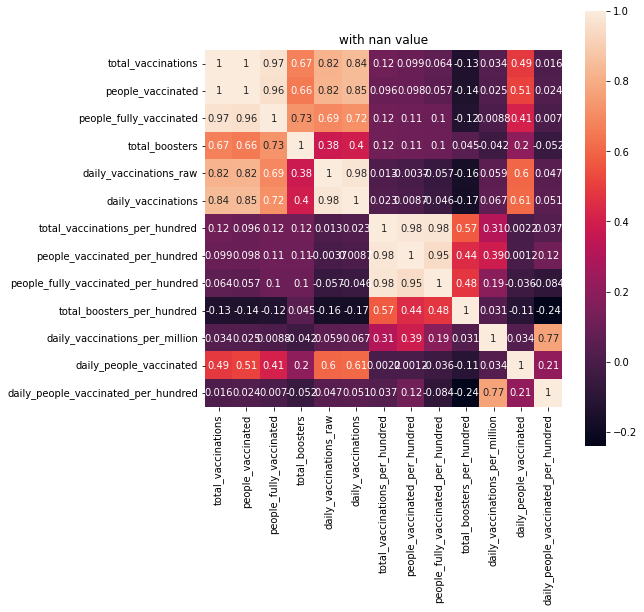

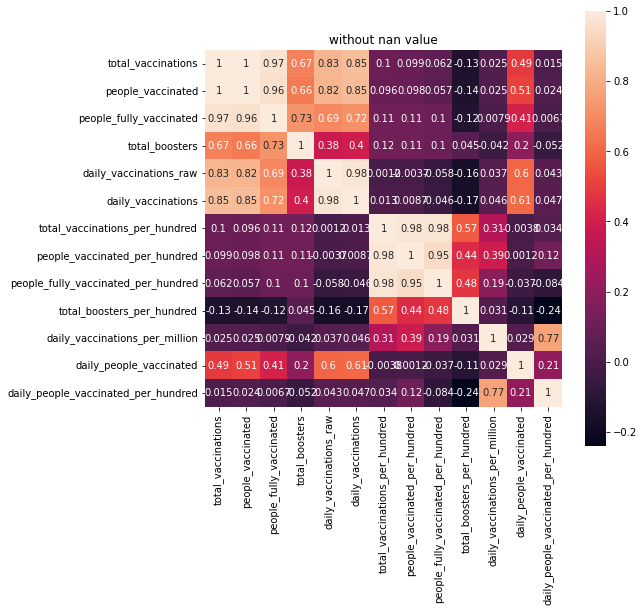

In [ ]:
check_df = df.drop(df[df.people_vaccinated_per_hundred.isna()].index)
#correlation matrix
plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, square=True)
plt.title('with nan value')
plt.show()
plt.subplots(figsize=(8, 8))
sns.heatmap(check_df.corr(), annot=True, square=True)
plt.title('without nan value')
plt.show()

In [ ]:
p = mannwhitneyu(check_df['total_vaccinations_per_hundred'], check_df['people_vaccinated_per_hundred'])[1]
print(p)

0.0


p << 0.05, fill 0

##people fully vaccinated per hundred

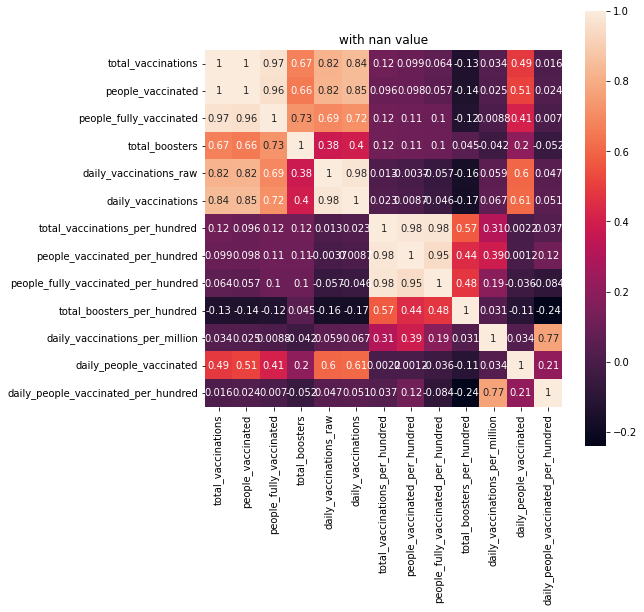

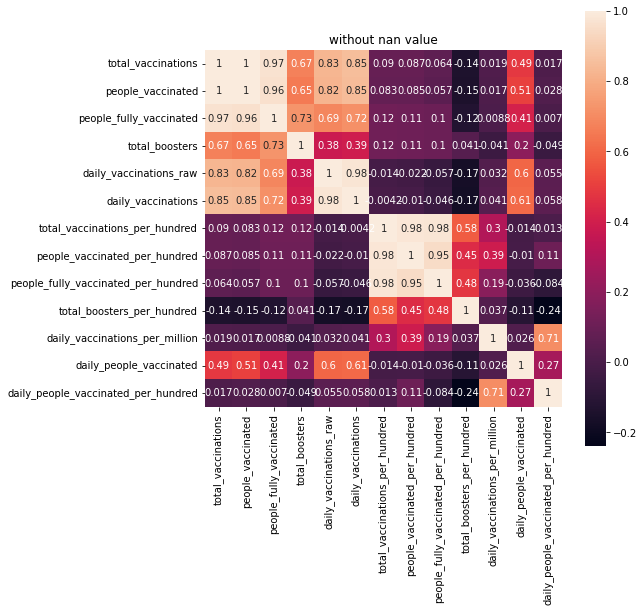

In [ ]:
check_df = df.drop(df[df.people_fully_vaccinated_per_hundred.isna()].index)
#correlation matrix
plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, square=True)
plt.title('with nan value')
plt.show()
plt.subplots(figsize=(8, 8))
sns.heatmap(check_df.corr(), annot=True, square=True)
plt.title('without nan value')
plt.show()

In [ ]:
p = mannwhitneyu(check_df['total_vaccinations_per_hundred'], check_df['people_fully_vaccinated_per_hundred'])[1]
print(p)

0.0


p << 0.05, fill 0

##fill zero

According to the analysis above, all nan values should be replaced by zero.

In [ ]:
df = df.fillna(0)

# Part 2: Data Visualization and Exploratory Data Analysis

In [ ]:
df

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,0.0,0.0,0.0,1367.0,0.02,0.02,0.00,0.0,34.0,1367.0,0.003
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,0.0,0.0,0.0,2862.0,0.14,0.14,0.00,0.0,72.0,2862.0,0.007
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,0.0,0.0,0.0,3000.0,0.30,0.30,0.00,0.0,75.0,3000.0,0.008
59,Afghanistan,AFG,2021-04-22,240000.0,240000.0,0.0,0.0,0.0,8000.0,0.60,0.60,0.00,0.0,201.0,8000.0,0.020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63000,Zimbabwe,ZWE,2021-11-16,6228119.0,3515140.0,2712979.0,0.0,37816.0,24487.0,41.27,23.29,17.98,0.0,1622.0,17188.0,0.114
63002,Zimbabwe,ZWE,2021-11-18,6310431.0,3583256.0,2727175.0,0.0,0.0,29822.0,41.81,23.74,18.07,0.0,1976.0,22810.0,0.151
63003,Zimbabwe,ZWE,2021-11-19,6362499.0,3625221.0,2737278.0,0.0,52068.0,33163.0,42.16,24.02,18.14,0.0,2197.0,25915.0,0.172
63004,Zimbabwe,ZWE,2021-11-20,6396012.0,3651820.0,2744192.0,0.0,33513.0,34377.0,42.38,24.20,18.18,0.0,2278.0,26983.0,0.179


## Countries which have the most doses given

In [ ]:
# check all locations without repetition
df['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Estonia',
       'Eswatini', 'Ethi

,location,total_vaccinations
0,World,7.713117e+09
1,Asia,5.229499e+09
2,Upper middle income,3.655719e+09
3,China,2.437252e+09
4,Lower middle income,2.238259e+09
5,High income,1.772234e+09
6,India,1.168057e+09
7,Europe,9.163825e+08
8,North America,7.292666e+08
9,European Union,6.186240e+08


,location,total_vaccinations
3,China,2.437252e+09
6,India,1.168057e+09
11,United States,4.514538e+08
12,Brazil,2.979605e+08
13,Indonesia,2.236386e+08
15,Japan,1.960267e+08
16,Mexico,1.309756e+08
17,Pakistan,1.204486e+08
18,Russia,1.197596e+08
19,Turkey,1.193277e+08


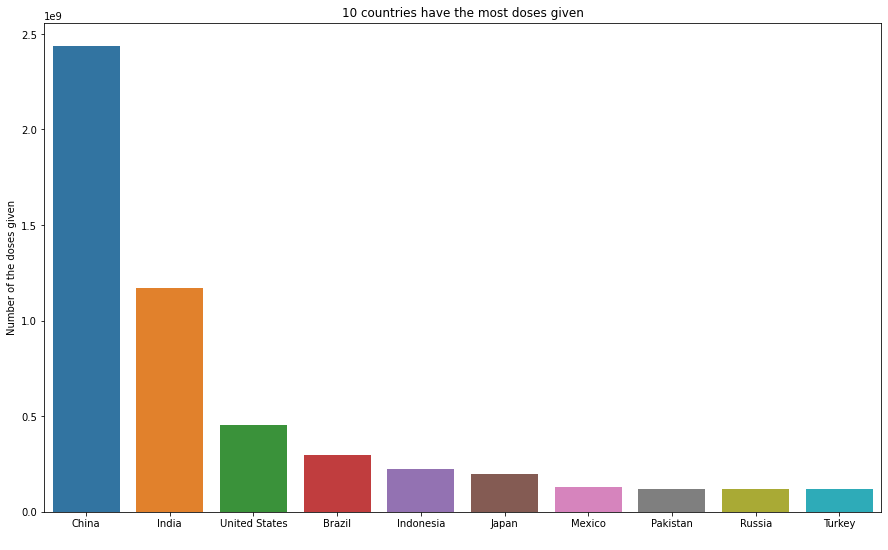

In [ ]:
# Grouping the data by locations and then sorting the data by the max value from highest to lowest
top_total_vaccinations = df.groupby('location').total_vaccinations.max().sort_values(ascending=False)
total_vaccinations_f = top_total_vaccinations.reset_index() 

# drop the locations which are not countries
display(total_vaccinations_f[:20])
total_vaccinations_f = total_vaccinations_f.drop(index=[0,1,2,4,5,7,8,9,10,14])
display(total_vaccinations_f[:10])

# Plotting a barplot for data viz using matplotlib and seaborn
plt.figure(figsize=(15, 9))
plt.title('10 countries have the most doses given')
sns.barplot(x=total_vaccinations_f.location[0:10], y=total_vaccinations_f['total_vaccinations'])
plt.xlabel(' ')
plt.ylabel('Number of the doses given');

We can see the number of doses given is most correlated to the population of the country. The economy and technology power seems doesn't have a big influence.

## Countries with highest vaccination rate

,location,people_vaccinated_per_hundred
1,Pitcairn,100.00
2,United Arab Emirates,98.10
3,Singapore,92.99
4,Brunei,90.56
5,Cuba,89.47
6,Portugal,89.04
7,Chile,87.38
8,Cayman Islands,86.25
9,China,84.82


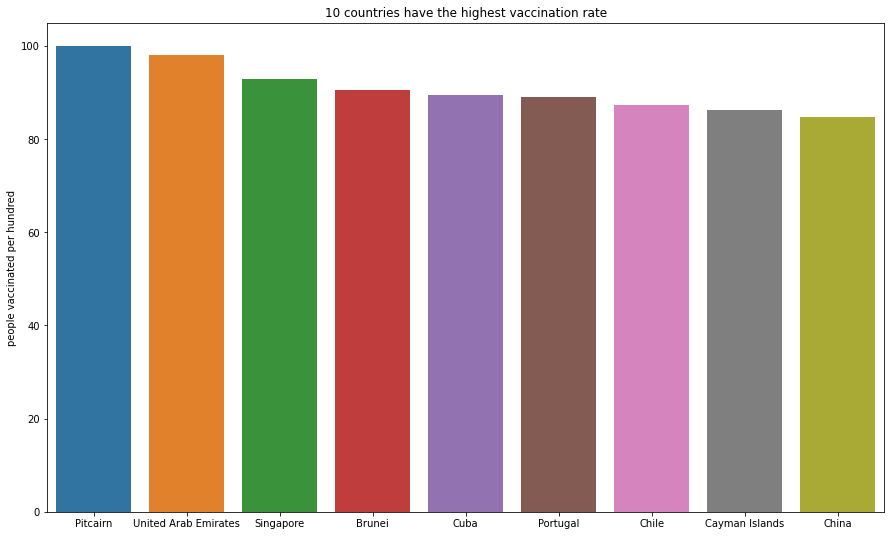

In [ ]:
# Grouping the data by locations and then sorting the data by the max value of people_vaccinated_per_hundred
vaccinated_per_hundred = df.groupby('location').people_vaccinated_per_hundred.max().sort_values(ascending=False)
vaccinated_per_hundred_f = vaccinated_per_hundred.reset_index() 

# The first row of data is abnormal so we drop it
display(vaccinated_per_hundred_f[1:10])

# Plotting a barplot for data viz using matplotlib and seaborn
plt.figure(figsize=(15, 9))
plt.title('10 countries have the highest vaccination rate')
sns.barplot(x=vaccinated_per_hundred_f.location[1:10], y=vaccinated_per_hundred_f['people_vaccinated_per_hundred'])
plt.xlabel(' ')
plt.ylabel('people vaccinated per hundred');

We can see that most countries have highest vaccination rate are small countries with small number of population and small area. Some other of them are wealthy countries whihc makes sense. But the fact that China is in the top ten is surprising while China is such a large country with medium GDP per capita. We can see China really did a good job in vaccinations and proof of the pandemic.

## Countries which have the most effective vaccination programme

The effeciency of vaccination programme can be an important metric to evaluate a country's vaccination situation. And we can use daily_vaccination to see the differences of effeciency of the countries.

,location,daily_vaccinations
0,World,43233999.0
1,Asia,33335736.0
2,Upper middle income,27439252.0
3,China,22424286.0
4,Lower middle income,16674499.0
5,India,10037995.0
6,High income,8397153.0
7,Europe,5128678.0
8,North America,4173238.0
9,European Union,4075834.0


,location,daily_vaccinations
3,China,22424286.0
5,India,10037995.0
11,United States,3499189.0
12,Brazil,2595170.0
14,Japan,1997542.0
15,Indonesia,1901294.0
16,Mexico,1648223.0
17,Vietnam,1632517.0
18,Bangladesh,1502924.0
19,Pakistan,1280906.0


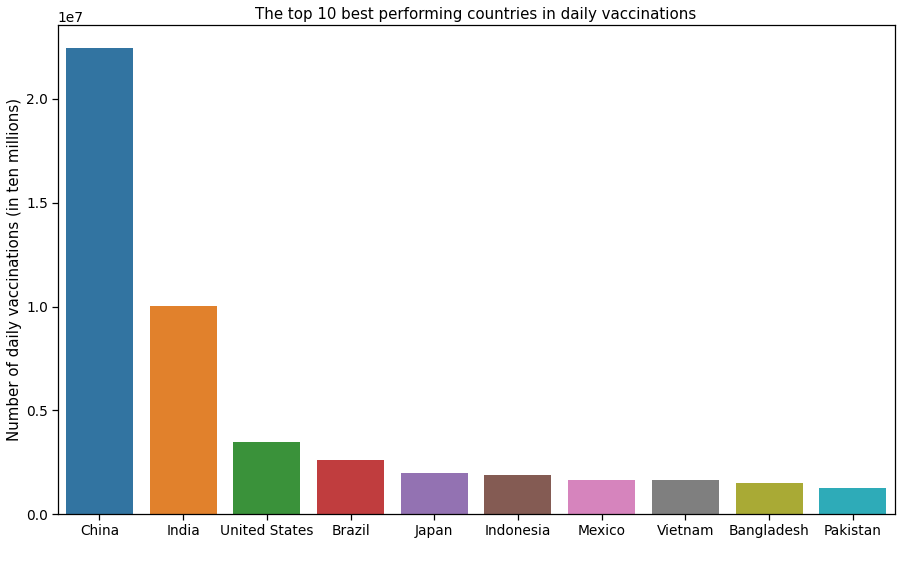

In [ ]:
# Grouping the data by location and then sorting the data by the max value from highest to lowest
top_daily = df.groupby('location').daily_vaccinations.max().sort_values(ascending=False)
top_daily = top_daily.reset_index()

display(top_daily[:20])
# drop the locations which are not countries
top_daily = top_daily.drop(index=[0,1,2,4,6,7,8,9,10,13])
display(top_daily[:10])

# Plotting the data
with sns.plotting_context('notebook', font_scale = 1.25):
    plt.figure(figsize=(15, 9))
    plt.title('The top 10 best performing countries in daily vaccinations')
    sns.barplot(x=top_daily.location[0:10], y=top_daily.daily_vaccinations[0:10])
    plt.xlabel(' ')
    plt.ylabel('Number of daily vaccinations (in ten millions)');

We can see the vaccination speed is most correlated to the population of the countries. Most of the countries in the plot have top ten population of the world. Then it may be correlated to the resource and infrastructure of the countries. GDP is not an factor as most countries are developing countries here.

## Progression in daily vaccinations over time

,location,date,daily_vaccinations
14083,India,2021-01-15,0.0
14383,Indonesia,2021-01-12,0.0
15989,Japan,2021-02-17,0.0
5948,China,2020-12-15,0.0
2732,Bangladesh,2021-01-26,0.0
...,...,...,...
6059,China,2021-06-29,21993000.0
6054,China,2021-06-24,21998714.0
6056,China,2021-06-26,22105857.0
6057,China,2021-06-27,22366286.0


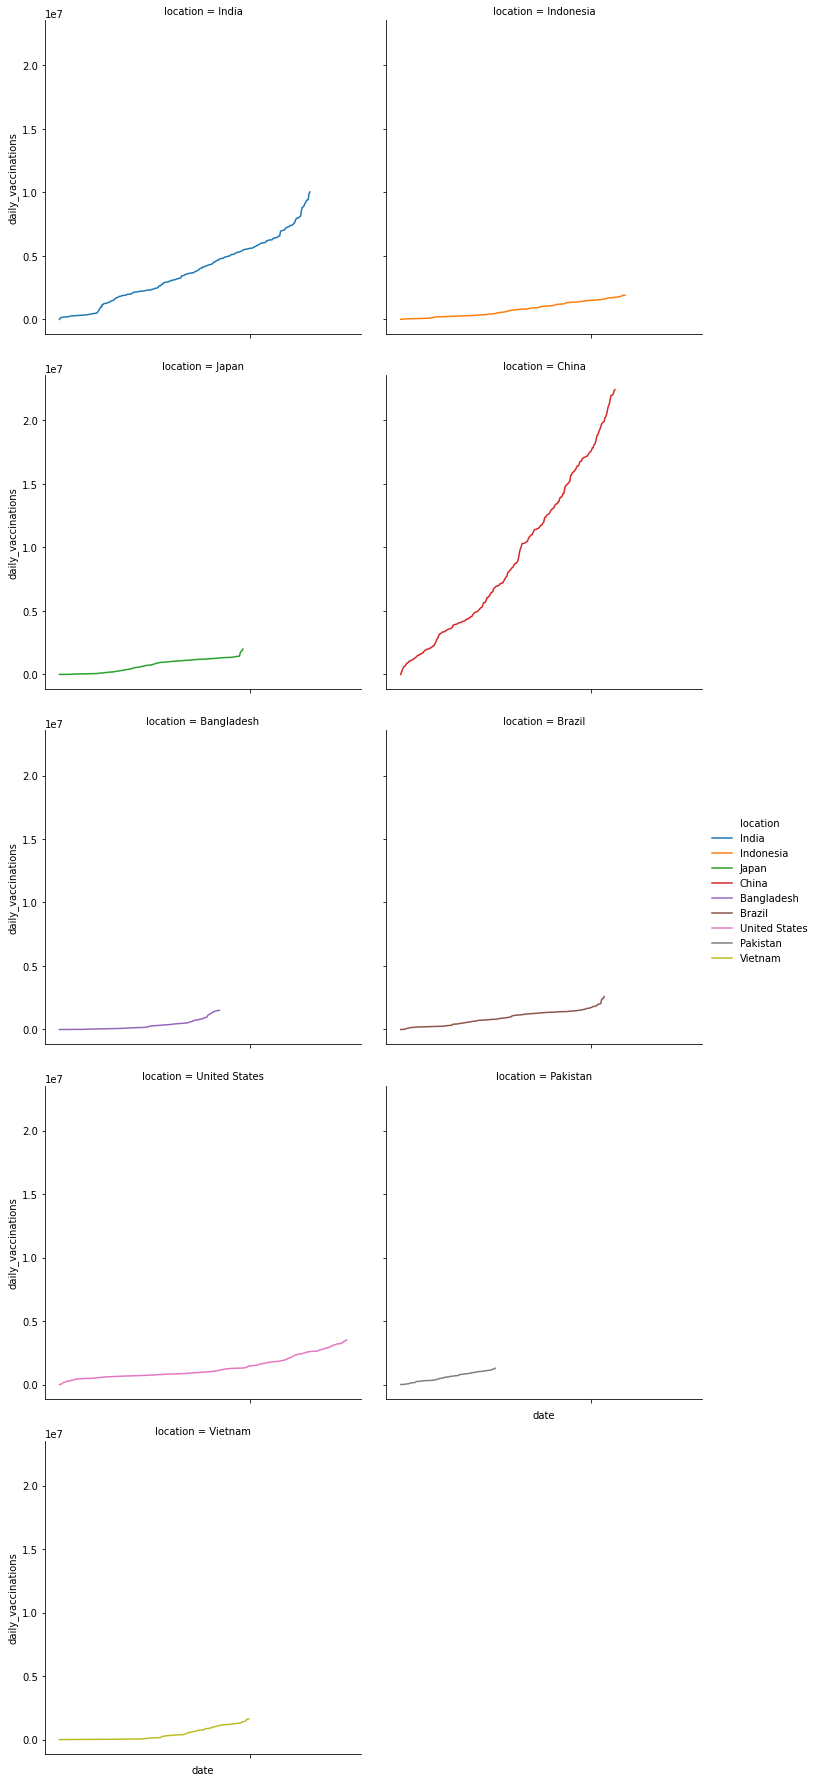

In [ ]:
# Establishing which columns are relevant and preparing the dataset
cols = ['country', 'date', 'daily_vaccinations']
covid_df = df.reset_index()

# Creating a list of the aforementioned best performing countries in terms of daily vaccinations
top_10_countries = [
    'China',
    'India',
    'United States',
    'Brazil',
    'Japan',
    'Indonesia',
    'Mexico	',
    'Vietnam',
    'Bangladesh',
    'Pakistan'	
]

# Filtering and sorting the data
daily_vacc_df = covid_df[['location', 'date', 'daily_vaccinations']].sort_values(by='daily_vaccinations', ascending=True)
top_10_dv_df = daily_vacc_df[daily_vacc_df.location.isin(top_10_countries)].dropna()

display(top_10_dv_df) # verifying that the filtering executed correctly

# Plotting the data in a multi faceted lineplot

sns.relplot(data=top_10_dv_df, x='date', y='daily_vaccinations', hue='location', col='location', kind='line', col_wrap=2)
plt.xticks('');
plt.show()

We can see that some countries like Pakistan, Bangladesh, Japan don't have data of recent dates. I think maybe the data is lost or there is a shortage of vaccines in these countries. Another explanation which isn't really possible is that these countries have stopped vaccinating for a while . Most countries' increasing trends of daily vaccinations are stable and slow, but China and India have faster growing speed. That may because they have larger population and more vaccinations are bought or manufactured.

# Part 3: Model selection and fitting to data

## Analysis of Canada

In [ ]:
#Create new columns based on distinct values and count them
df = df.sort_values('location')
df['eid'] = (df.groupby(['location']).cumcount()==0).astype(int)
df['eid'] = df['eid'].cumsum()
ndf=df.loc[df['eid'] == 38]

#check dataframe of Canada
sndf = ndf.sort_values('date')
sndf

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred,eid
9795,Canada,CAN,2020-12-14,5.0,5.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,38
9796,Canada,CAN,2020-12-15,727.0,727.0,0.0,0.0,722.0,722.0,0.00,0.00,0.00,0.00,19.0,722.0,0.002,38
9797,Canada,CAN,2020-12-16,3016.0,3016.0,0.0,0.0,2289.0,1506.0,0.01,0.01,0.00,0.00,40.0,1506.0,0.004,38
9798,Canada,CAN,2020-12-17,7267.0,7267.0,0.0,0.0,4251.0,2421.0,0.02,0.02,0.00,0.00,64.0,2421.0,0.006,38
9799,Canada,CAN,2020-12-18,11276.0,11276.0,0.0,0.0,4009.0,2818.0,0.03,0.03,0.00,0.00,74.0,2818.0,0.007,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10133,Canada,CAN,2021-11-17,59776509.0,30102545.0,28764923.0,909041.0,76112.0,61164.0,157.03,79.08,75.56,2.39,1607.0,14376.0,0.038,38
10134,Canada,CAN,2021-11-18,59852559.0,30121803.0,28795770.0,934986.0,76050.0,66659.0,157.23,79.13,75.64,2.46,1751.0,15696.0,0.041,38
10135,Canada,CAN,2021-11-19,59918117.0,30136287.0,28821607.0,960223.0,65558.0,62649.0,157.40,79.16,75.71,2.52,1646.0,14717.0,0.039,38
10136,Canada,CAN,2021-11-20,59947684.0,30145291.0,28837538.0,964855.0,29567.0,62168.0,157.48,79.19,75.75,2.53,1633.0,14706.0,0.039,38


In [ ]:
# get the value of vaccination rate of Canada
value = sndf['people_vaccinated_per_hundred'].values

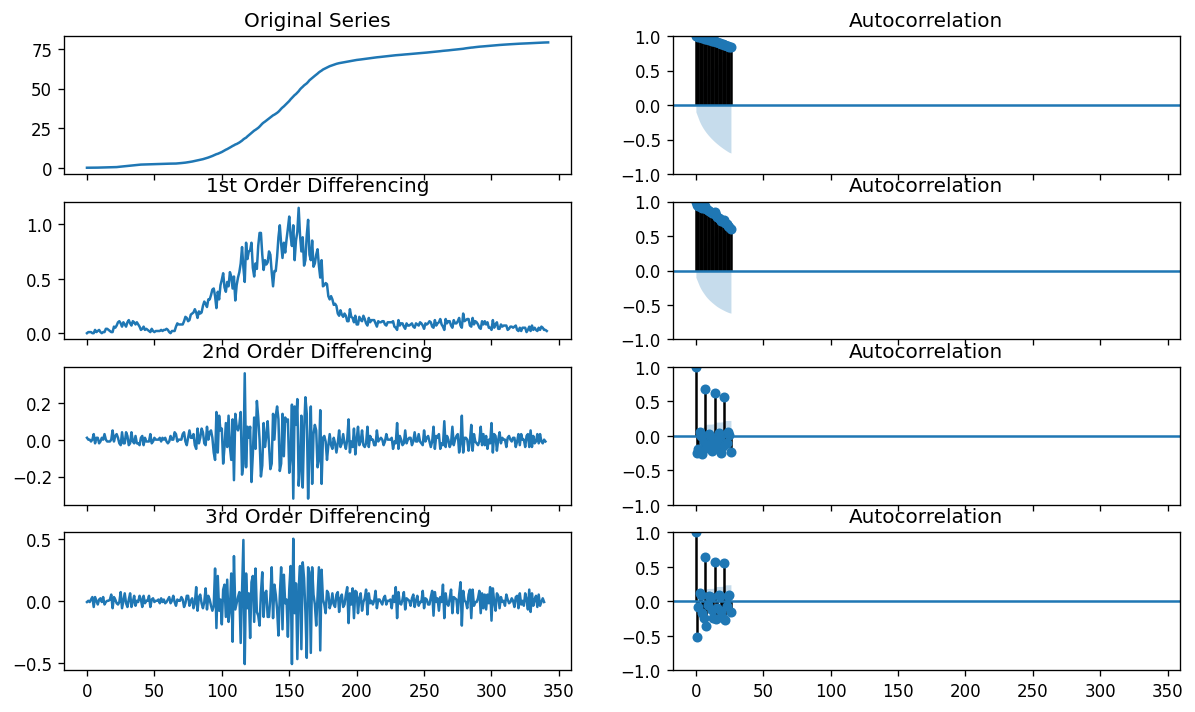

In [ ]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(12,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(4, 2, sharex=True)
axes[0, 0].plot(value); axes[0, 0].set_title('Original Series')
plot_acf(value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(value)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(value), ax=axes[1, 1])
diffval = np.diff(value)

# 2nd Differencing
axes[2, 0].plot(np.diff(diffval)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(diffval), ax=axes[2, 1])
diffval = np.diff(diffval)

# 3rd Differencing
axes[3, 0].plot(np.diff(diffval)); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(np.diff(diffval), ax=axes[3, 1])
plt.show()

From the plots above, I think 2nd order differencing is enough for the time series to be stationary.

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

# let the model itself to find the best d
model = pm.auto_arima(value, trace=True, suppress_warnings=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-829.925, Time=0.38 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-776.375, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-796.401, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-819.566, Time=0.08 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-831.934, Time=0.20 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-833.339, Time=0.12 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-831.975, Time=0.32 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-829.548, Time=0.18 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-836.736, Time=0.65 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=-881.857, Time=0.82 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=-893.754, Time=0.97 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=-835.044, Time=0.72 sec
 ARIMA(4,2,3)(0,0,0)[0]             : AIC=-900.284, Time=0.91 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=-858.902, Time=0.82 sec
 ARIMA(5,2,3)(0,0,0)[0]          

  We can see the best d is 2 and matches the result of differencing before.

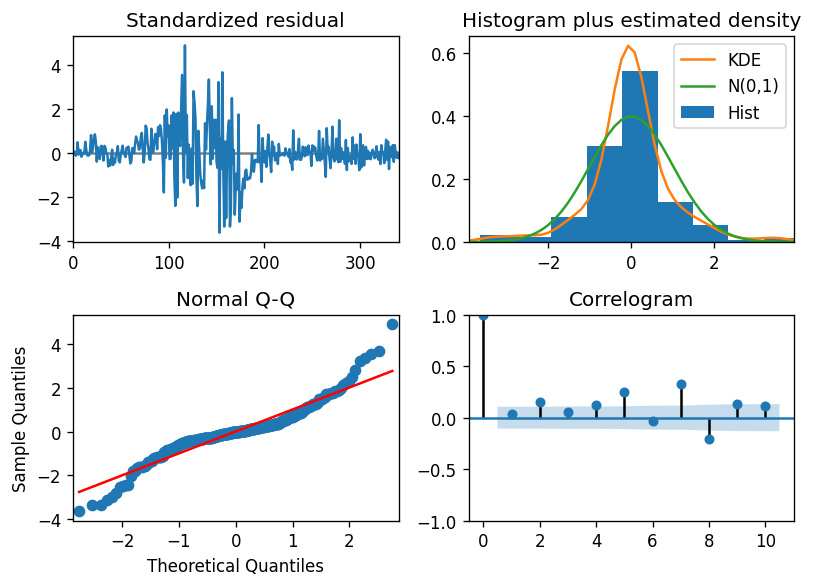

In [ ]:
model.plot_diagnostics(figsize=(7,5))
plt.tight_layout()
plt.show()

The Standardized residual is almost stationary and with zero means. It's not correlated with the lagged version of itself.

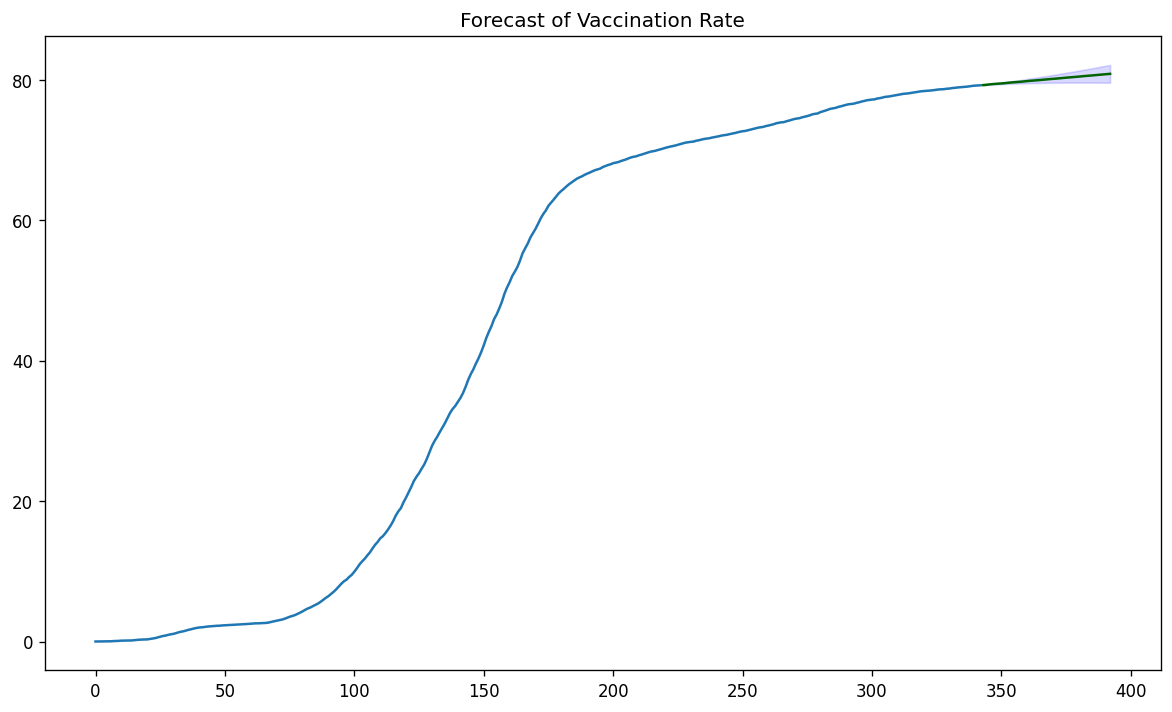

In [ ]:
# Forecast
n_periods = 50

# if we use a smaller alpha, the lower_series will decrease which is not possible in reality and then I choose a large alpha 
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True, alpha=0.8)
index_of_fc = np.arange(len(value), len(value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
lower_series,
upper_series,
color='b', alpha=.15)
plt.title("Forecast of Vaccination Rate")
plt.show()

As we can see, the future vaccination rate doesn't decrease and is rather smooth.

## Analysis of UK

In [ ]:
#Create new columns based on distinct values and count them
df = df.sort_values('location')
df['eid'] = (df.groupby(['location']).cumcount()==0).astype(int)
df['eid'] = df['eid'].cumsum()
ndf=df.loc[df['eid'] == 222]

#check dataframe of Canada
sndf = ndf.sort_values('date')
sndf

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred,eid
59213,United Kingdom,GBR,2021-01-10,2677971.0,2286572.0,391399.0,0.0,0.0,0.0,3.93,3.35,0.57,0.00,0.0,0.0,0.000,222
59214,United Kingdom,GBR,2021-01-11,2843815.0,2431648.0,412167.0,0.0,165844.0,165844.0,4.17,3.57,0.60,0.00,2431.0,145076.0,0.213,222
59215,United Kingdom,GBR,2021-01-12,3067541.0,2639309.0,428232.0,0.0,223726.0,194785.0,4.50,3.87,0.63,0.00,2856.0,176368.0,0.259,222
59216,United Kingdom,GBR,2021-01-13,3356229.0,2918252.0,437977.0,0.0,288688.0,226086.0,4.92,4.28,0.64,0.00,3315.0,210560.0,0.309,222
59217,United Kingdom,GBR,2021-01-14,3678180.0,3234946.0,443234.0,0.0,321951.0,250052.0,5.39,4.74,0.65,0.00,3666.0,237094.0,0.348,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59523,United Kingdom,GBR,2021-11-16,110206709.0,50645981.0,46065838.0,13494890.0,398862.0,436561.0,161.58,74.25,67.54,19.79,6401.0,44264.0,0.065,222
59524,United Kingdom,GBR,2021-11-17,110646342.0,50679073.0,46087958.0,13879311.0,439633.0,399481.0,162.22,74.30,67.57,20.35,5857.0,31965.0,0.047,222
59525,United Kingdom,GBR,2021-11-18,111082929.0,50707953.0,46108608.0,14266368.0,436587.0,400442.0,162.86,74.34,67.60,20.92,5871.0,30893.0,0.045,222
59526,United Kingdom,GBR,2021-11-19,111478701.0,50734556.0,46129532.0,14614613.0,395772.0,397816.0,163.44,74.38,67.63,21.43,5832.0,29788.0,0.044,222


In [ ]:
# get the value of vaccination rate of China
value = sndf['people_vaccinated_per_hundred'].values

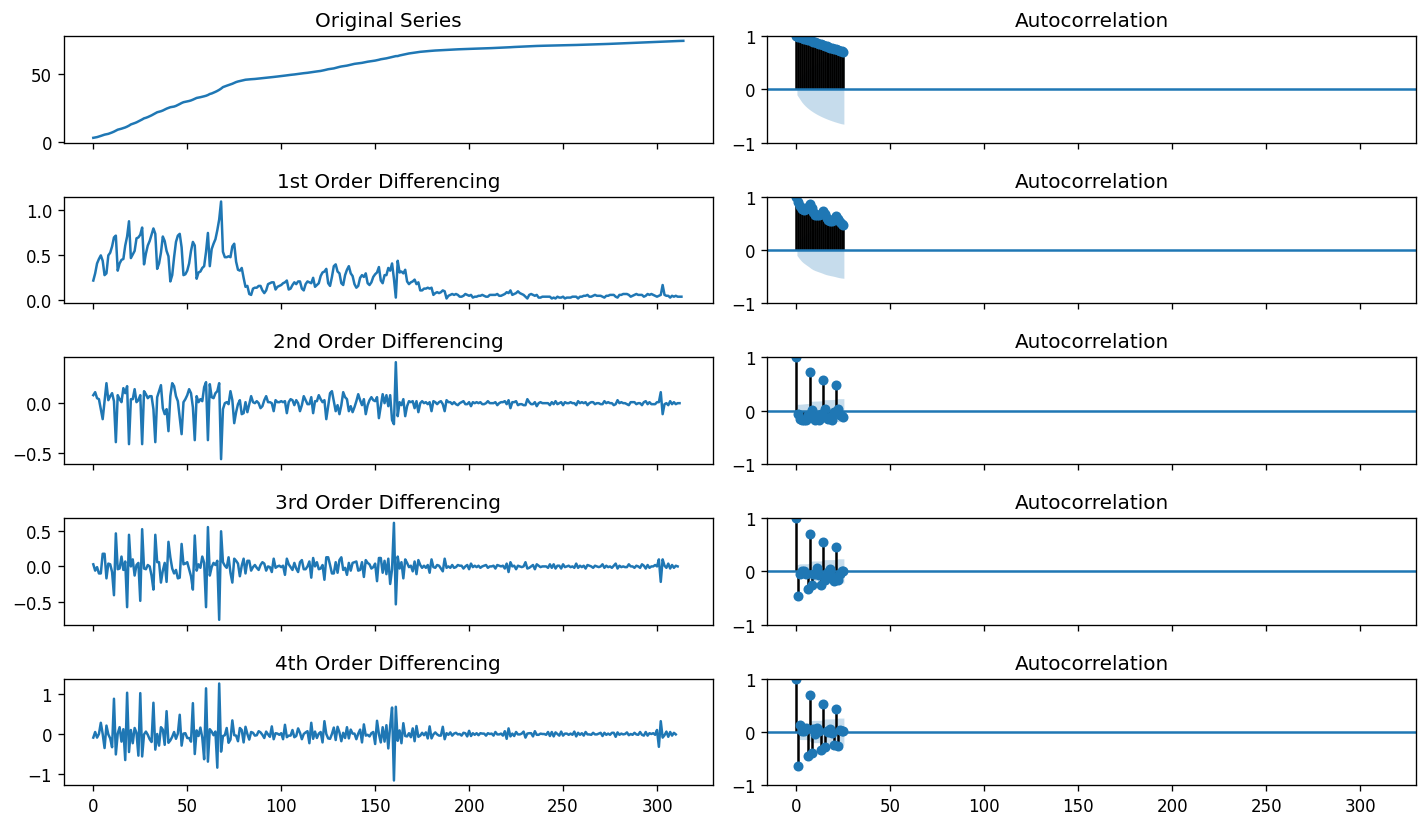

In [ ]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(12,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(5, 2, sharex=True)
axes[0, 0].plot(value); axes[0, 0].set_title('Original Series')
plot_acf(value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(value)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(value), ax=axes[1, 1])
diffval = np.diff(value)

# 2nd Differencing
axes[2, 0].plot(np.diff(diffval)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(diffval), ax=axes[2, 1])
diffval = np.diff(diffval)

# 3rd Differencing
axes[3, 0].plot(np.diff(diffval)); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(np.diff(diffval), ax=axes[3, 1])
diffval = np.diff(diffval)

# 4th Differencing
axes[4, 0].plot(np.diff(diffval)); axes[4, 0].set_title('4th Order Differencing')
plot_acf(np.diff(diffval), ax=axes[4, 1])
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(value, start_p=1, start_q=1,
test='adf', # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1, # frequency of series
d=None, # let model determine 'd'
seasonal=False, # No Seasonality
start_P=0,
D=0,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-624.767, Time=0.57 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-589.801, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-589.279, Time=0.11 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-590.188, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-591.789, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-620.456, Time=0.85 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-625.859, Time=0.28 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-634.215, Time=0.49 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-635.517, Time=0.96 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=-713.263, Time=1.12 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-632.286, Time=0.90 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=-710.249, Time=1.38 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-665.249, Time=1.09 sec
 ARIMA(2,2,3)(0,0,0)[0]             : 

The modul automaticaly chooses d = 2 which matches the manually differencing result before.

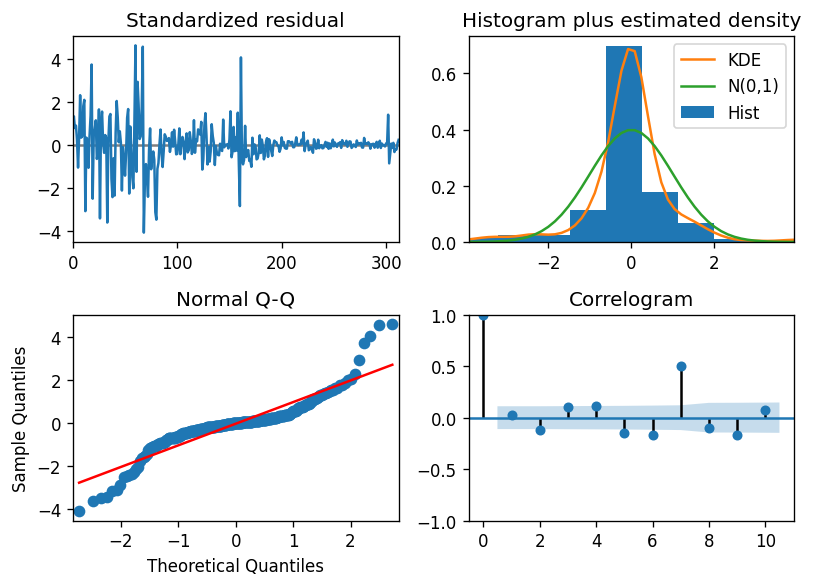

In [ ]:
model.plot_diagnostics(figsize=(7,5))
plt.tight_layout()
plt.show()

The Standardized residual is almost stationary and with zero means. It's not correlated with the lagged version of itself. The correlogram has low values except one outlier at first.

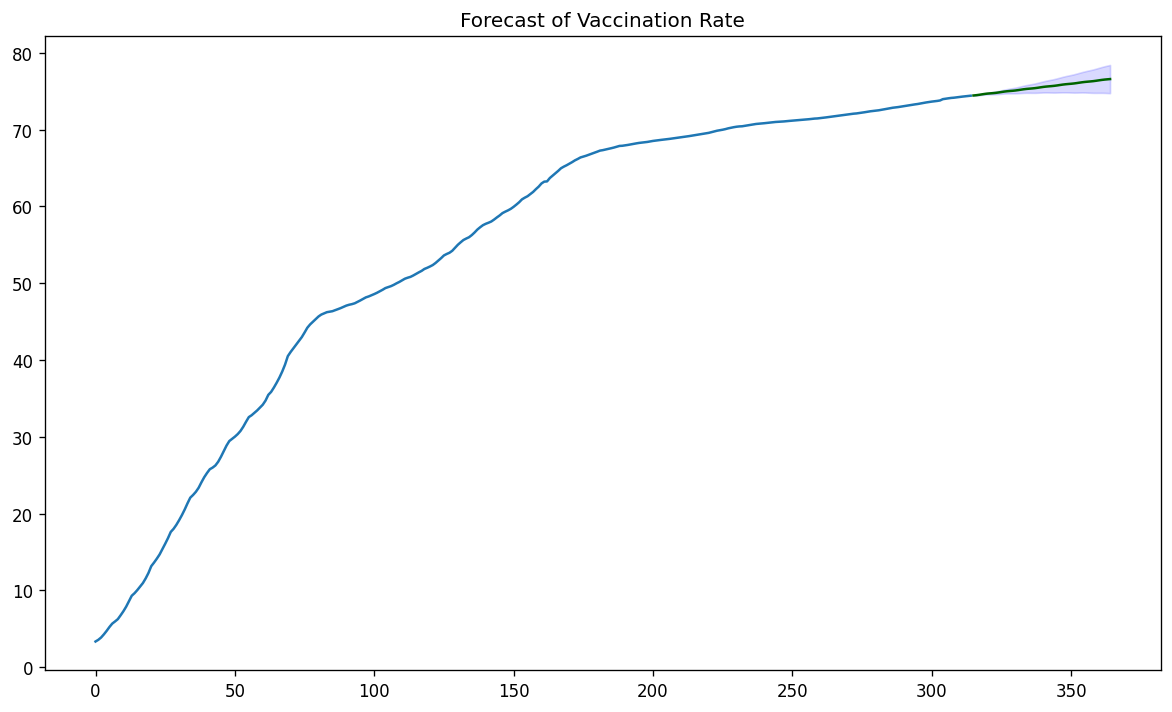

In [ ]:
# Forecast
n_periods = 50

# choose a larger alpha to prevent a decreasing lower_series
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True, alpha=0.8)
index_of_fc = np.arange(len(value), len(value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
lower_series,
upper_series,
color='b', alpha=.15)
plt.title("Forecast of Vaccination Rate")
plt.show()

# Part 4: Relating COVID-19 Vaccination to a Second Dataset

## Canada

In [ ]:
# use Complete_covid19_dataset.csv for part 4
upload = files.upload()

Saving Complete_covid19_dataset.csv to Complete_covid19_dataset.csv


In [ ]:
df2 = pd.read_csv('Complete_covid19_dataset.csv')
df2 = df2.drop(df2[df2.total_vaccinations.isna()].index)
df2 = df2[df2['iso_code'] == 'CAN']
df2

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
21633,CAN,North America,Canada,2020-12-14,474661.0,8645.0,6658.143,13677.0,140.0,111.571,12468.795,227.094,174.902,359.279,3.678,2.931,1.05,685.0,17.994,3335.0,87.607,NaN,NaN,NaN,NaN,131408.0,16008664.0,420.529,3.452,126618.0,3.326,0.053,19.0,tests performed,5.0,5.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,70.83,38067913.0,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,NaN,NaN,NaN,NaN
21634,CAN,North America,Canada,2020-12-15,480952.0,6291.0,6661.714,13793.0,116.0,114.286,12634.052,165.257,174.996,362.326,3.047,3.002,1.04,704.0,18.493,3499.0,91.915,NaN,NaN,NaN,NaN,123736.0,16132400.0,423.779,3.250,128820.0,3.384,0.052,19.3,tests performed,727.0,727.0,NaN,NaN,722.0,722.0,0.00,0.00,NaN,NaN,19.0,722.0,0.002,70.83,38067913.0,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,NaN,NaN,NaN,NaN
21635,CAN,North America,Canada,2020-12-16,487685.0,6733.0,6706.857,13911.0,118.0,114.571,12810.920,176.868,176.181,365.426,3.100,3.010,1.04,720.0,18.914,3549.0,93.228,NaN,NaN,NaN,NaN,96979.0,16229379.0,426.327,2.548,128724.0,3.381,0.052,19.2,tests performed,3016.0,3016.0,NaN,NaN,2289.0,1506.0,0.01,0.01,NaN,NaN,40.0,1506.0,0.004,70.83,38067913.0,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,NaN,NaN,NaN,NaN
21636,CAN,North America,Canada,2020-12-17,495152.0,7467.0,6830.143,14067.0,156.0,120.000,13007.070,196.149,179.420,369.524,4.098,3.152,1.04,720.0,18.914,3556.0,93.412,NaN,NaN,NaN,NaN,127245.0,16356624.0,429.670,3.343,129656.0,3.406,0.053,19.0,tests performed,7267.0,7267.0,NaN,NaN,4251.0,2421.0,0.02,0.02,NaN,NaN,64.0,2421.0,0.006,70.83,38067913.0,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,NaN,NaN,NaN,NaN
21637,CAN,North America,Canada,2020-12-18,502197.0,7045.0,6849.000,14180.0,113.0,117.857,13192.134,185.064,179.915,372.492,2.968,3.096,1.03,722.0,18.966,3506.0,92.099,NaN,NaN,NaN,NaN,136648.0,16493272.0,433.259,3.590,129786.0,3.409,0.053,18.9,tests performed,11276.0,11276.0,NaN,NaN,4009.0,2818.0,0.03,0.03,NaN,NaN,74.0,2818.0,0.007,70.83,38067913.0,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21969,CAN,North America,Canada,2021-11-15,1760822.0,4370.0,2497.714,29435.0,50.0,27.000,46254.755,114.795,65.612,773.2

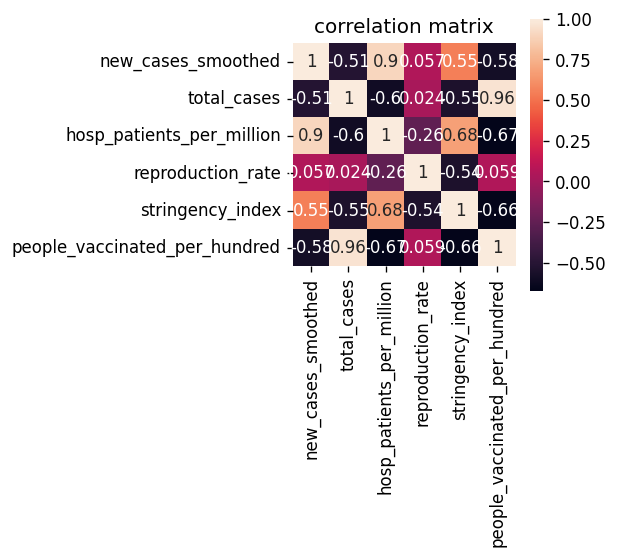

In [ ]:
# use correlation matrix to find which features are correlated to the vaccination rates much
# I choose some features that I think may have higher correlation with vaccination rate
corr_df = df2[['new_cases_smoothed','total_cases','hosp_patients_per_million','reproduction_rate','stringency_index','people_vaccinated_per_hundred']].corr()
plt.figure(figsize=(3,3))
sns.heatmap(corr_df, annot=True, square=True)
plt.title('correlation matrix')
plt.show()

We can find that new cases, hospital patients , govern policy and reproduction rate of covid-19 are all not very related to the vaccination rate. Total cases is highly related with the vaccination rate.

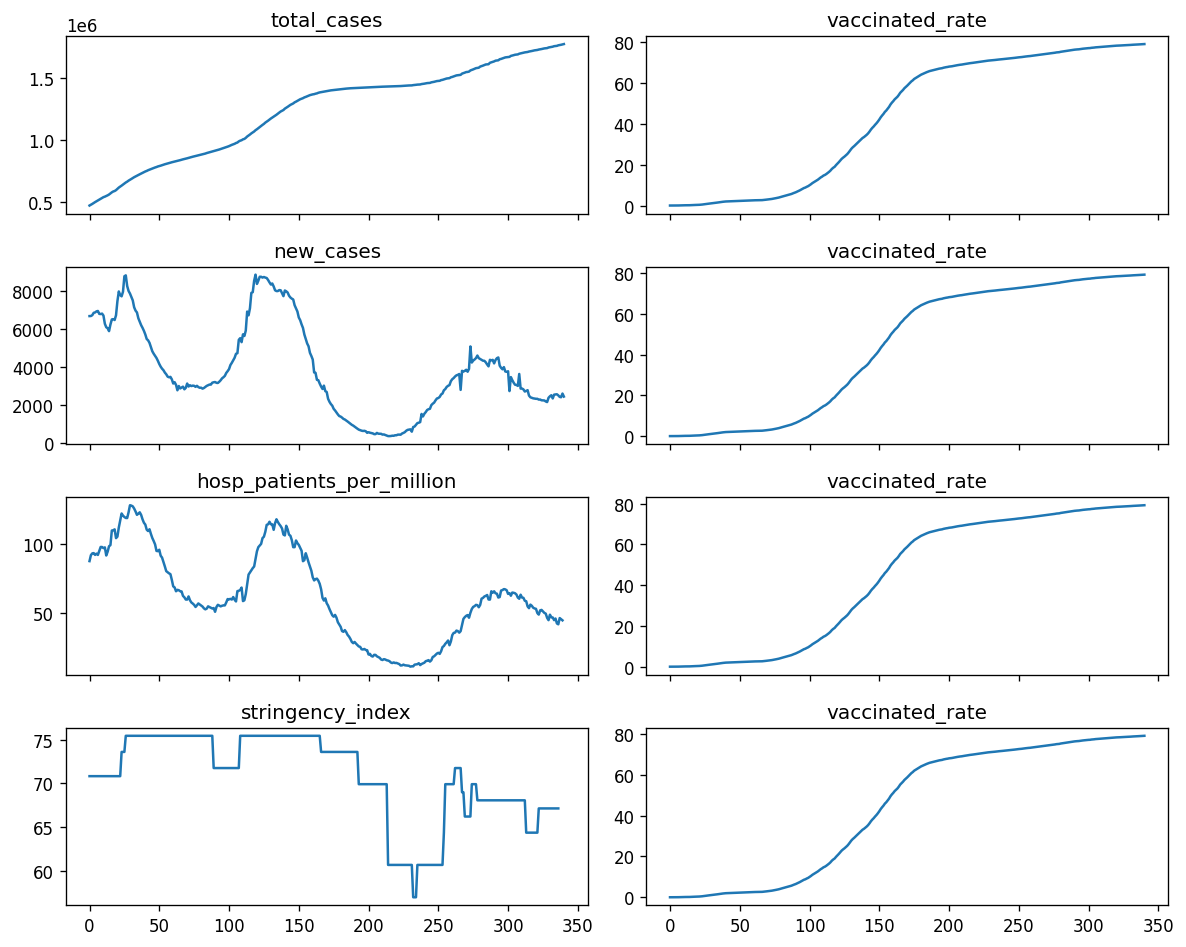

In [ ]:
# Compare the trend of features in plots
total_cases = df2['total_cases'].values
new_cases = df2['new_cases_smoothed'].values
vaccinated_rate = df2['people_vaccinated_per_hundred'].values
hosp_patients_per_million = df2['hosp_patients_per_million'].values
stringency_index = df2['stringency_index'].values
fig, axes = plt.subplots(4, 2, sharex=True, figsize=(10,8))
axes[0,0].plot(total_cases); axes[0,0].set_title('total_cases')
axes[0,1].plot(vaccinated_rate); axes[0,1].set_title('vaccinated_rate')
axes[1,0].plot(new_cases); axes[1,0].set_title('new_cases')
axes[1,1].plot(vaccinated_rate); axes[1,1].set_title('vaccinated_rate')
axes[2,0].plot(hosp_patients_per_million); axes[2,0].set_title('hosp_patients_per_million')
axes[2,1].plot(vaccinated_rate); axes[2,1].set_title('vaccinated_rate')
axes[3,0].plot(stringency_index); axes[3,0].set_title('stringency_index')
axes[3,1].plot(vaccinated_rate); axes[3,1].set_title('vaccinated_rate')
plt.tight_layout()
plt.show()

The curves of total cases and vaccinated rate are similar. We can assume that when the total cases increase, the situation is worse and worse and people are more careful about the covid-19 and more willing to be vaccined. Meanwhile the government may introduce policies to encourage vaccinations. From the other side, we can find that the increasing vaccinated rate seems not to slow down the increasing speed of total cases. The new cases has several crests of wave and is not influenced by the vaccinated rate much. But we can also see that the highest values of the crests are decreasing which shows that the vaccination does have effect.

 Number of hospital patients is highly correlated to the new cases and it can show what a huge impact the covid-19 has on the healthcare industry. The stringency index is correlated to the vaccinated rate in some degree. During the increase of vaccinated rate from day 100 to day 200, the index decreases. But the index then increases again. It may be because of some other reasons like the appearence of amutation.

## UK

In [ ]:
df3 = pd.read_csv('Complete_covid19_dataset.csv')
df3 = df3.drop(df3[df3.total_vaccinations.isna()].index)
df3 = df3[df3['iso_code'] == 'GBR']
df3

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
126578,GBR,Europe,United Kingdom,2021-01-10,3081372.0,55026.0,59809.857,81567.0,567.0,918.571,45176.695,806.749,876.886,1195.872,8.313,13.467,1.04,3264.0,47.854,35391.0,518.875,NaN,NaN,28804.0,422.302,442182.0,49952913.0,732.371,6.483,529300.0,7.760,0.113,8.8,tests performed,2677971.0,2286572.0,391399.0,NaN,NaN,NaN,3.93,3.35,0.57,NaN,NaN,NaN,NaN,87.96,68207114.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,86256.2,13.68,46.32,1264.621752
126579,GBR,Europe,United Kingdom,2021-01-11,3127647.0,46275.0,58003.000,82096.0,529.0,935.571,45855.143,678.448,850.395,1203.628,7.756,13.717,0.97,3363.0,49.306,36751.0,538.815,NaN,NaN,NaN,NaN,517549.0,50470462.0,739.959,7.588,537250.0,7.877,0.108,9.3,tests performed,2843815.0,2431648.0,412167.0,NaN,165844.0,165844.0,4.17,3.57,0.60,NaN,2431.0,145076.0,0.213,87.96,68207114.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
126580,GBR,Europe,United Kingdom,2021-01-12,3173295.0,45648.0,55797.429,83342.0,1246.0,987.714,46524.399,669.256,818.059,1221.896,18.268,14.481,0.93,3496.0,51.256,36981.0,542.187,NaN,NaN,NaN,NaN,546892.0,51017354.0,747.977,8.018,545886.0,8.003,0.102,9.8,tests performed,3067541.0,2639309.0,428232.0,NaN,223726.0,194785.0,4.50,3.87,0.63,NaN,2856.0,176368.0,0.259,87.96,68207114.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
126581,GBR,Europe,United Kingdom,2021-01-13,3220957.0,47662.0,53669.714,84910.0,1568.0,1062.857,47223.183,698.783,786.864,1244.885,22.989,15.583,0.91,3626.0,53.162,37487.0,549.605,NaN,NaN,NaN,NaN,602318.0,51619672.0,756.808,8.831,554778.0,8.134,0.097,10.3,tests performed,3356229.0,2918252.0,437977.0,NaN,288688.0,226086.0,4.92,4.28,0.64,NaN,3315.0,210560.0,0.309,87.96,68207114.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
126582,GBR,Europe,United Kingdom,2021-01-14,3269761.0,48804.0,53100.714,86163.0,1253.0,1075.857,47938.709,715.527,778.522,1263.255,18.371,15.773,0.90,3672.0,53.836,37691.0,552.596,NaN,NaN,NaN,NaN,661829.0,52281501.0,766.511,9.703,563715.0,8.265,0.094,10.6,tests performed,3678180.0,3234946.0,443234.0,NaN,321951.0,250052.0,5.39,4.74,0.65,NaN,3666.0,237094.0,0.348,87.96,68207114.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

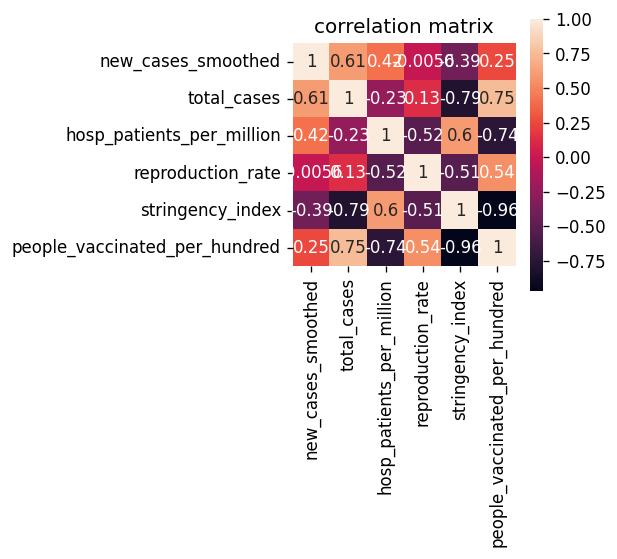

In [ ]:
# use correlation matrix to find which features are correlated to the vaccination rates much
# I choose some features that I think may have higher correlation with vaccination rate
# use new_cases_smoothed as new cases here for a better visualiazation
corr_df = df3[['new_cases_smoothed','total_cases','hosp_patients_per_million','reproduction_rate','stringency_index','people_vaccinated_per_hundred']].corr()
plt.figure(figsize=(3,3))
sns.heatmap(corr_df, annot=True, square=True)
plt.title('correlation matrix')
plt.show()

Being different from the data of Canada, the UK's vaccinated rate has highest correlation with the stringency index. And it's also correlated to total cases and hosp_patients_per_million.

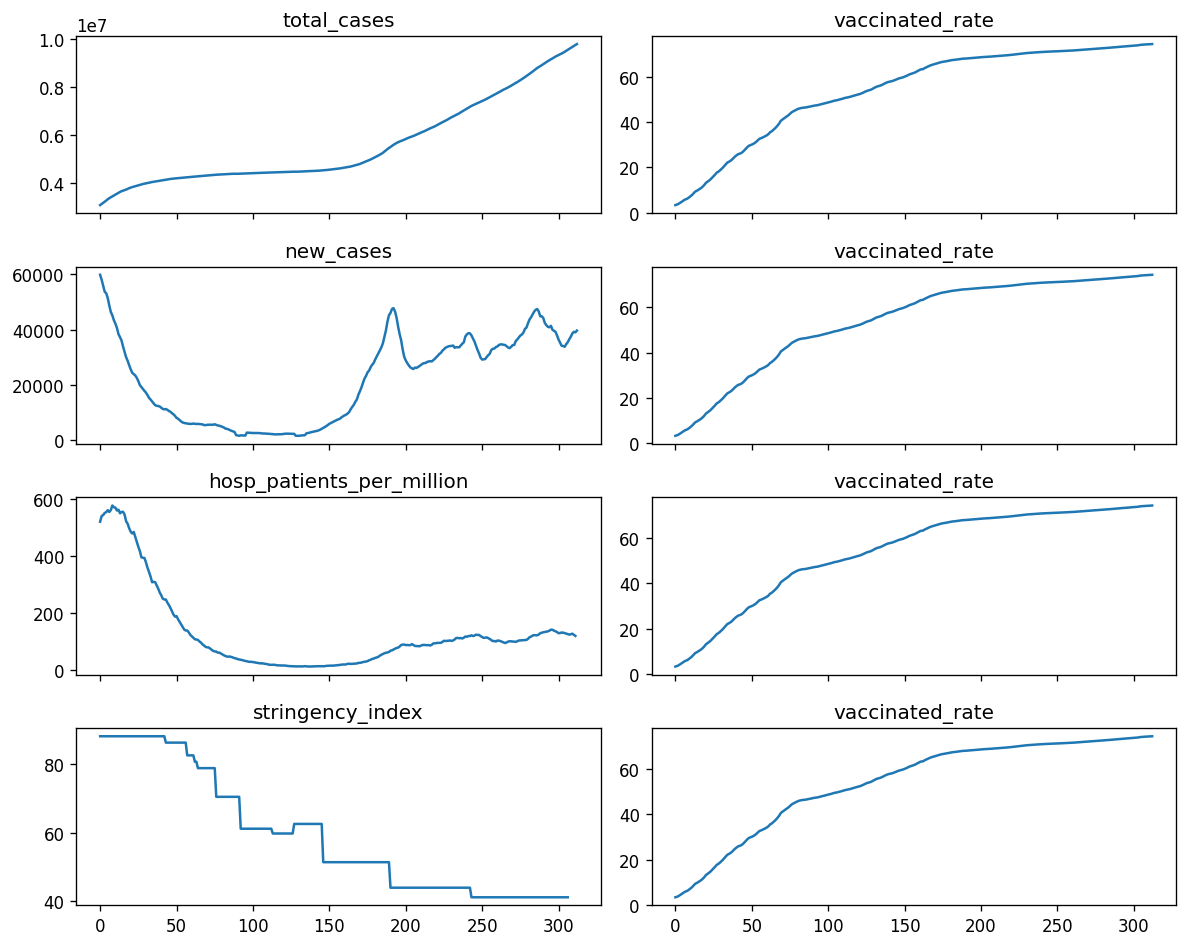

In [ ]:
# Compare the trend of features in plots
total_cases = df3['total_cases'].values
new_cases = df3['new_cases_smoothed'].values
vaccinated_rate = df3['people_vaccinated_per_hundred'].values
hosp_patients_per_million = df3['hosp_patients_per_million'].values
stringency_index = df3['stringency_index'].values
fig, axes = plt.subplots(4, 2, sharex=True, figsize=(10,8))
axes[0,0].plot(total_cases); axes[0,0].set_title('total_cases')
axes[0,1].plot(vaccinated_rate); axes[0,1].set_title('vaccinated_rate')
axes[1,0].plot(new_cases); axes[1,0].set_title('new_cases')
axes[1,1].plot(vaccinated_rate); axes[1,1].set_title('vaccinated_rate')
axes[2,0].plot(hosp_patients_per_million); axes[2,0].set_title('hosp_patients_per_million')
axes[2,1].plot(vaccinated_rate); axes[2,1].set_title('vaccinated_rate')
axes[3,0].plot(stringency_index); axes[3,0].set_title('stringency_index')
axes[3,1].plot(vaccinated_rate); axes[3,1].set_title('vaccinated_rate')
plt.tight_layout()
plt.show()

  We can see the stringency index has highest correlation with vaccinated rate and we can assume that the government introduce a loose policy because of the increasing vaccinated rate. However, the loose policy makes the new cases increase. Hospital patients per million is also correlated to vaccinated rate. It decreases a lot when the vaccinated rate increase.

# Part 5: Deriving insights about the effect of vaccination and discussion

##  From all countries, which one has the most efficient vaccination program?

From the overall dataset, we can say China has the most efficient vaccination program. We can find that from the top 10 countries of daily vaccinations. Number of daily vaccinations in China is much more than that in the 2nd country India. But considering the large population of China, we also should consider the vaccination rate of China to make sure if it really has a highly efficient vaccination program.

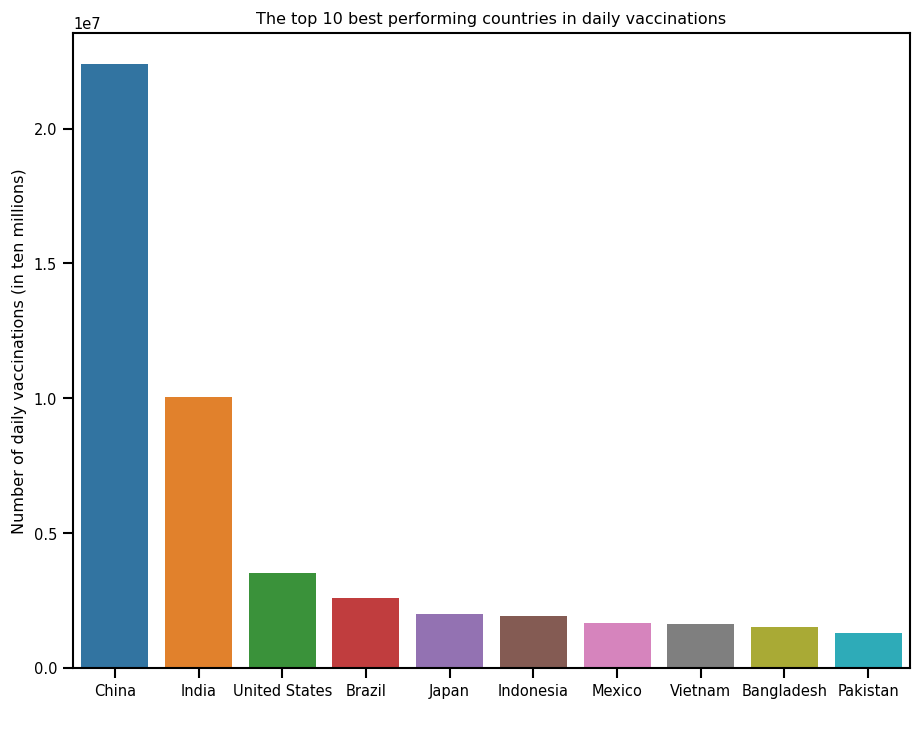

In [ ]:
# Grouping the data by location and then sorting the data by the max value from highest to lowest
top_daily = df.groupby('location').daily_vaccinations.max().sort_values(ascending=False)
top_daily = top_daily.reset_index()

# drop the locations which are not countries
top_daily = top_daily.drop(index=[0,1,2,4,6,7,8,9,10,13])

# Plotting the data
with sns.plotting_context('notebook', font_scale = 0.8):
    plt.figure(figsize=(9, 7))
    plt.title('The top 10 best performing countries in daily vaccinations')
    sns.barplot(x=top_daily.location[0:10], y=top_daily.daily_vaccinations[0:10])
    plt.xlabel(' ')
    plt.ylabel('Number of daily vaccinations (in ten millions)');

I've already looked into the vaccination rate of countries above, we can see the plots here again. None of countries in top 10 daily vaccination list appears in top 10 highest vaccination list except China. It's amazing that China has both quality and quantity in vaccination. Considering the high density of population in China, it's absolutely the country with the most efficient vaccination program.

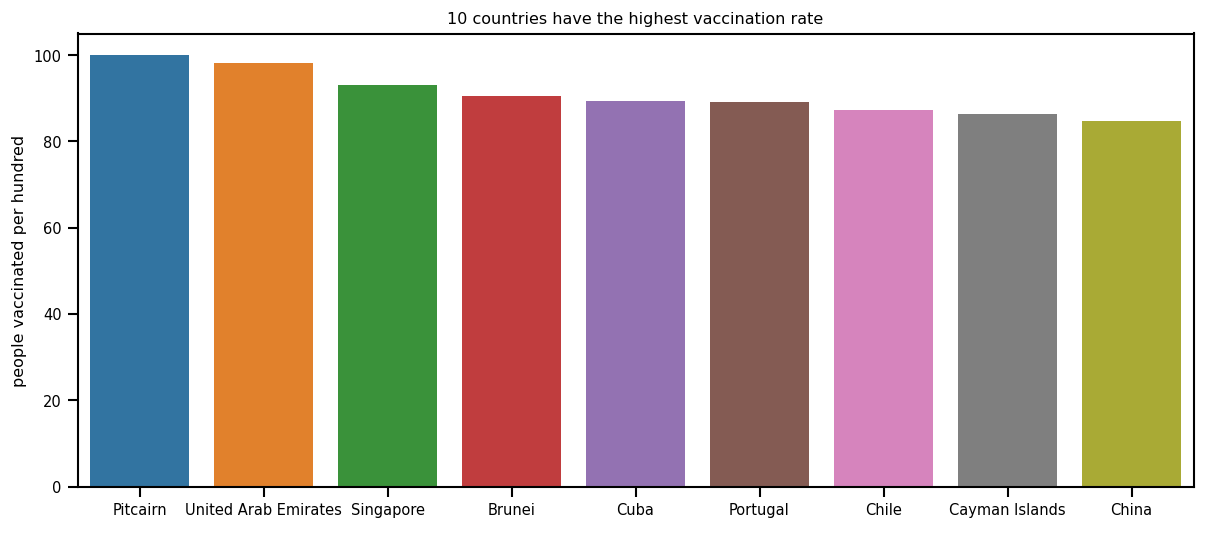

In [ ]:
# Grouping the data by locations and then sorting the data by the max value of people_vaccinated_per_hundred
vaccinated_per_hundred = df.groupby('location').people_vaccinated_per_hundred.max().sort_values(ascending=False)
vaccinated_per_hundred_f = vaccinated_per_hundred.reset_index() 

# Plotting a barplot for data viz using matplotlib and seaborn
with sns.plotting_context('notebook', font_scale = 0.8):
  plt.figure(figsize=(12,5))
  plt.title('10 countries have the highest vaccination rate')
  sns.barplot(x=vaccinated_per_hundred_f.location[1:10], y=vaccinated_per_hundred_f['people_vaccinated_per_hundred'])
  plt.xlabel(' ')
  plt.ylabel('people vaccinated per hundred');

## From the countries analyzed, which one has a more effective vaccination program? Canada or the UK?

From part 4, we can see that the daily new cases increase when the vaccinated increases in UK. The number of new cases in recent days are even similar to those at the beginning of the pandemic. We can conclude that the UK's vaccination program is not that good.

As for Canada, though the number of new cases has a periodic pattern, the crest of the period is decreasing. And the absolute number of new cases in Canada is much less than that of UK, considering the total population difference is not big.

We can compare some other features here to find out why Canada has more effective vaccination program than the UK.
I choose new cases per million, new deaths per million and new deaths 3 features.

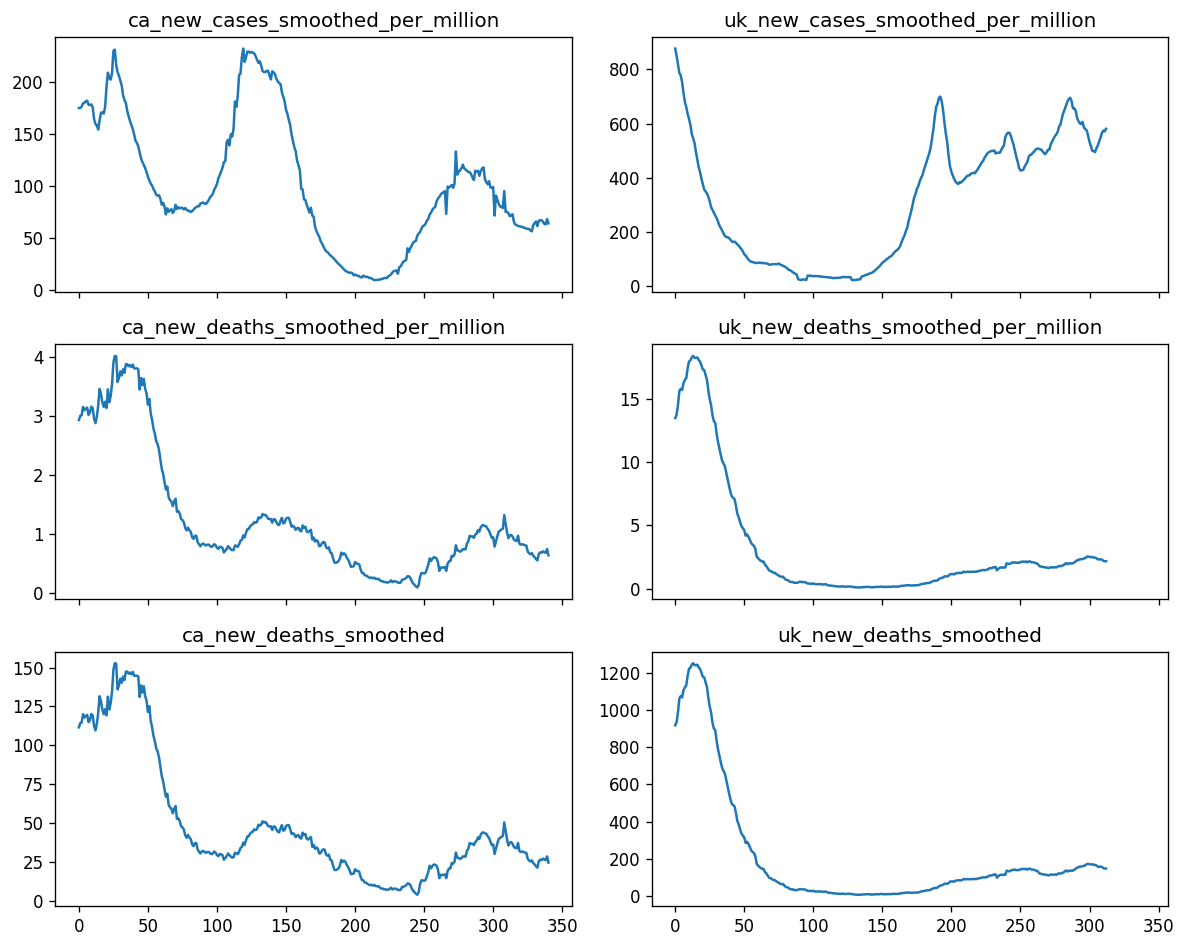

In [ ]:
# data of Canada
ca_new_cases_smoothed_per_million = df2['new_cases_smoothed_per_million'].values
ca_new_deaths_smoothed_per_million = df2['new_deaths_smoothed_per_million'].values
ca_new_deaths_smoothed = df2['new_deaths_smoothed'].values
# data of UK
uk_new_cases_smoothed_per_million = df3['new_cases_smoothed_per_million'].values
uk_new_deaths_smoothed_per_million = df3['new_deaths_smoothed_per_million'].values
uk_new_deaths_smoothed = df3['new_deaths_smoothed'].values

fig, axes = plt.subplots(3, 2, sharex=True, figsize=(10,8))
axes[0,0].plot(ca_new_cases_smoothed_per_million); axes[0,0].set_title('ca_new_cases_smoothed_per_million')
axes[0,1].plot(uk_new_cases_smoothed_per_million); axes[0,1].set_title('uk_new_cases_smoothed_per_million')
axes[1,0].plot(ca_new_deaths_smoothed_per_million); axes[1,0].set_title('ca_new_deaths_smoothed_per_million')
axes[1,1].plot(uk_new_deaths_smoothed_per_million); axes[1,1].set_title('uk_new_deaths_smoothed_per_million')
axes[2,0].plot(ca_new_deaths_smoothed); axes[2,0].set_title('ca_new_deaths_smoothed')
axes[2,1].plot(uk_new_deaths_smoothed); axes[2,1].set_title('uk_new_deaths_smoothed')
plt.tight_layout()
plt.show()

We can find out that the trend of death and death rate figures are similar, but the number of new deaths of Canada is smaller than that of UK. The death rate in Canada is also lower. New cases per million in Canada are fewer than those in UK.

According to the information above, the vaccination program of UK does have a good performance on decreasing the death but it's not good at decreasing the new cases. The program of Canada is good at dealing wiht both new cases and death. However, we should also consider that UK has a more loose policy which may cause the increase of new cases.